## <font color=darkcyan>Modèles de mélange</font>

#### <font color=darkorange>Densité de mélange </font>

Considérons un mélange de $K$ lois gaussiennes dont la densité est donnée par
$$f_\theta(x)=\sum_{k=1}^K\pi_kf_{\mathcal N(\mu_k,\sigma^2_k)}(x),$$
où $0<\pi_k<1$, $\sum_{k=1}^K\pi_k=1$, $\mu_k\in\mathbb R$ et $\sigma_k>0$, $k=1,\dots,K$. 


In [1]:
"""""""""""""""""
Required packages
"""""""""""""""""
import seaborn as sns
import math
import autograd.numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
# package which differentiates standard Python and Numpy code
from autograd import grad
# to get progress bars
from tqdm import tqdm

#### Question 1
Ecrire une fonction **multi_gauss** qui prend en argument une moyenne et une matrice de covariance et renvoie l'opposé de  la logdensité gaussienne associée à ces paramètres. On écrira une fonction pour une variable en dimension $d>1$.

In [132]:
def multi_gauss(mu, sigma):
    """
    Inputs
    ----------
    mu: mean of the Gaussian distribution
    sigma: covariance matrix of the Gaussian distribution
    
    Outputs
    -------
    logp: opposite of the loglikelihood
    """

    # A completer
    def logp(x):
        d = x.shape[-1]
        scal1 = (x-mu) @ np.linalg.inv(sigma)
        # log densité (pas négative log !!!!!)
        log_dens = -0.5 * ( d*np.log(2*np.pi) + np.log(np.linalg.det(sigma)) + np.sum(scal1*(x-mu), axis=-1) )
        return log_dens


    return logp

#### Question 2
Ecrire une fonction **mixture** qui prend en argument différentes logdensités et un vecteur de poids et renvoie la logdensité du mélange associé.

In [75]:
def mixture(log_prob, weights):
    """
    Inputs
    ----------
    log_prob: opposite of the likelihood of each term
    weights: weights of the components of the mixture
    
    Outputs
    -------
    logp: opposite of the loglikelihood of the mixture
    """
    
    # A completer
    def logp(x):
        # logs densités
        log_dens = np.array([ log_prob[i](x) for i in range(len(log_prob)) ])
        # log densité pondérée
        return np.log( np.average(np.exp(log_dens), weights=weights, axis=0) )

    return logp

#### Question 3
Utilisez la fonction précédente pour tracer la densité d'un mélange de trois gaussiennes en dimension 2.
Les mélanges de lois gaussiennes peuvent être implémentés directement en Python en utilisant le package `sklearn.mixture`, voir ici https://scikit-learn.org/stable/modules/mixture.html pour une aide détaillée (non nécessaire pour cette question).


(100, 100, 2)


<Figure size 640x640 with 0 Axes>

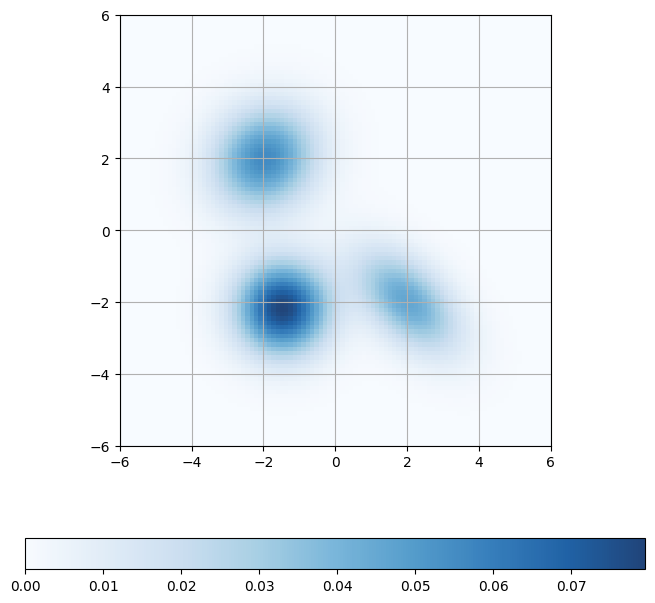

In [76]:
mu1 = 2*np.ones(2)
cov1 = np.array([[1., 0.5],
                [0.5, 1.]])
mu2 = -mu1
cov2 = np.array([[1., -0.1],
                [-0.1, 1.]])

mu3 = np.array([-1.5, 2.2])
cov3 = 0.8 * np.eye(2)

logp  = mixture([multi_gauss(mu1, cov1), multi_gauss(mu2, cov2), multi_gauss(mu3, cov3)], [0.25, 0.35, 0.4])

plt.figure(figsize=(8, 8), dpi=80)

grid_lim = 6
# grid on which the target pdf is displayed
grid_plot = (-grid_lim, grid_lim, -grid_lim, grid_lim)
# coordinates chosen on this grid
nb_points = 100

xplot = np.linspace(-grid_lim, grid_lim, nb_points)
yplot = np.linspace(-grid_lim, grid_lim, nb_points)
Xplot, Yplot = np.meshgrid(xplot, yplot)

# A completer
XY = np.dstack((Xplot,Yplot))
print(XY.shape)             # toute combinaison de paires possibles des coordonnées de l'intevralle

Zplot = np.exp(logp(XY))

fig, ax = plt.subplots(figsize=(8,8))
sp = ax.imshow(Zplot, alpha = 0.9, extent = grid_plot,  cmap = 'Blues', origin = 'upper')
ax.grid(True)
fig.colorbar(sp,orientation='horizontal')

#### Question 4
- Considérons les mélanges de loi uniforme $U[0,\lambda]$ dont la densité est donnée par 
$$f_\theta(x)=\sum_{k=1}^K\pi_kf_{U[0,\lambda_k]}(x),$$
où $0<\pi_k<1$, $\sum_{k=1}^K\pi_k=1$ et $\lambda_k>0$, $k=1,\dots,K$. Ecrire une fonction **uniform_logpdf** pour évaluer la densité du mélange. Quelles formes de densité peut-on obtenir avec un mélange uniforme ?
- Mêmes questions pour les mélanges de loi Gamma $\Gamma(\alpha,\beta)$ dont la densité est donnée par 
$$f_\theta(x)=\sum_{k=1}^K\pi_kf_{\Gamma(\alpha_k,\beta_k)}(x),$$
où $0<\pi_k<1$, $\sum_{k=1}^K\pi_k=1$ et $\alpha_k>0, \beta_k>0$ pour $k=1,\dots,K$.  Comparer aux formes des mélanges gaussiens.

In [111]:
def uniform_logpdf(lmbd):
    """
    Inputs
    ----------
    lmbd: upper bound of the support of the uniform distribution
    
    Outputs
    -------
    logp: opposite of the loglikelihood
    """

    # A completer
    def logp(x):
        # log densité
        return np.where((x>=0) * (x<=lmbd), -np.log(lmbd), -math.inf)

    return logp


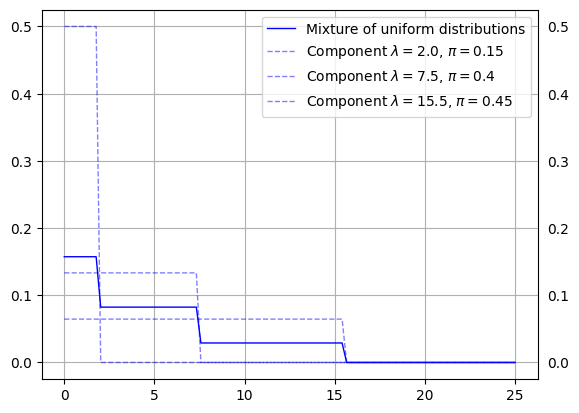

In [112]:
# A completer
weights =  np.array([0.15, 0.40,0.45])
lambdas = np.array([2,7.5,15.5])

log_mix_u = mixture([uniform_logpdf(lmbd) for lmbd in lambdas], weights)

nb_points = 100
x = np.linspace(0.01, 25.0, nb_points)

fig, ax = plt.subplots()

ax.plot(x,np.exp(log_mix_u(x)),'b', lw=1, label = 'Mixture of uniform distributions')
for i,lmbd in enumerate(lambdas):
    ax.plot(x, np.exp(uniform_logpdf(lmbd)(x)), 'b--', alpha = 0.5, lw=1, label = fr'Component $\lambda=${lmbd}, $\pi=${weights[i]}')
ax.tick_params(labelright=True)
ax.grid(True)
ax.legend()


In [113]:
def gamma_logpdf(a,b):
    """
    Inputs
    ----------
    a, b: shapes and inverse scales of the gamma distribution
    
    Outputs
    -------
    logp: opposite of the loglikelihood
    """

    # A completer
    def logp(x):
        # log densité
        return (a-1)*np.log(x) + a*np.log(b) - b*x - math.lgamma(a)

    return logp

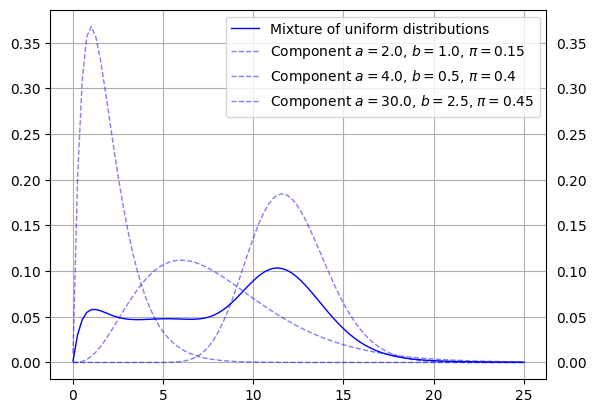

In [115]:
# A completer
a = [2.0,4.0,30.0]
b = [1.0,0.5,2.5]
weights =  np.array([0.15, 0.40,0.45])

log_mix_gamma = mixture([gamma_logpdf(a[i], b[i]) for i in range(len(a))], weights)

nb_points = 100
x = np.linspace(0.01, 25.0, nb_points)

fig, ax = plt.subplots()

ax.plot(x,np.exp(log_mix_gamma(x)),'b', lw=1, label = 'Mixture of uniform distributions')
for i,(ai,bi) in enumerate(zip(a,b)):
    ax.plot(x, np.exp(gamma_logpdf(ai,bi)(x)), 'b--', alpha = 0.5, lw=1, label = fr'Component $a=${ai}, $b=${bi}, $\pi=${weights[i]}')
ax.tick_params(labelright=True)
ax.grid(True)
ax.legend()

#### <font color=darkorange>Simulation de données</font>

#### Question 5
- Ecrire une fonction **rnormmix** pour générer des réalisations d'un mélange gaussien à $K$ composantes. Les arguments de la fonction sont la taille d'échantillon **n**, le moyennes, variances et poids des éléments du mélange.
- Tester votre fonction en générant un grand échantillon d'un mélange gaussien dont on compare l'histogramme à sa densité par un graphique.

In [205]:
def rnormmix(n, mu, sigma, weights):
    """
    Inputs
    ----------
    n: number of sample
    mu: mean of each component
    sigma: std of each component
    weights: weights of the mixture
    
    Outputs
    -------
    samples: samples from the mixture model
    """
    
    # A completer
    X = np.random.normal(0, 1, n)
    loi = np.random.choice(len(weights), size=n, p=weights)
    mix = mu[loi] + np.sqrt(sigma[loi])*X
    return mix

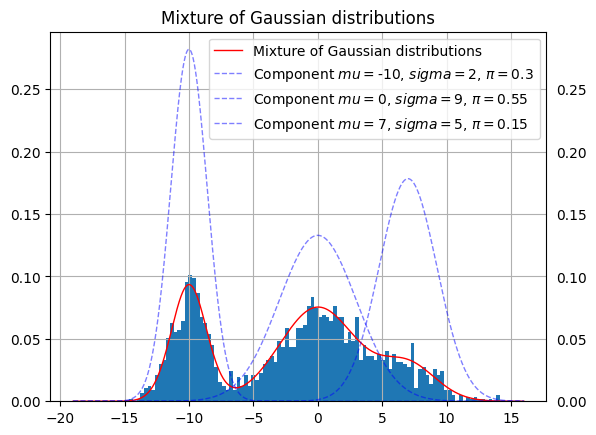

In [212]:
# A completer
def multi_Gaussian_1D(mean, variance):

    def Gaussian_1D(x):
      z = np.exp(-(x - mean)**2/(2*variance))/np.sqrt(2*np.pi*variance)
      return z

    return Gaussian_1D

# modélisation mixture
mus = np.array([-10, 0, 7])
sigmas = np.array([2, 9, 5])
probas = [0.3, 0.55, 0.15]
log_mix_gauss = mixture([multi_Gaussian_1D(mus[i], sigmas[i]) for i in range(len(probas))], probas)

nb_points = 2000
x = np.linspace(np.min(mus) - np.max(sigmas),
                np.max(mus) + np.max(sigmas), nb_points)

samples = rnormmix(nb_points, mus, sigmas, probas)

# affichage
fig, ax = plt.subplots()
count, bins, ignored = plt.hist(samples, 100, density=True)

ax.plot(x,log_mix_gauss(x),'r', lw=1, label = 'Mixture of Gaussian distributions')
for i,(mu_i,sigma_i) in enumerate(zip(mus,sigmas)):
    ax.plot(x, multi_Gaussian_1D(mu_i, sigma_i)(x), 'b--', alpha = 0.5, lw=1, label = fr'Component $mu=${mu_i}, $sigma=${sigma_i}, $\pi=${probas[i]}')

plt.title('Mixture of Gaussian distributions')
plt.tick_params(labelright=True)
plt.grid(True)
plt.legend()

#### <font color=darkorange>Estimation du modèle</font>

#### Question 6
- Estimez les paramètres du modèle en utilisant les échantillons précédents et le package `mixture` de `sklearn`. On pourra utiliser la classe `GaussianMixture` et la méthode `fit`.
- Fournissez les paramètres estimés (à l'aide des attributs `means_`, `weights_`, etc.).

In [ ]:
# A completer